In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Reading the .csv files from the dataset

In [2]:
train=pd.read_csv('train.csv')
campaign_data=pd.read_csv('campaign_data.csv')
coupon_item_mapping=pd.read_csv('coupon_item_mapping.csv')
customer_demographics=pd.read_csv('customer_demographics.csv')
customer_transaction_data=pd.read_csv('customer_transaction_data.csv')
ctd=customer_transaction_data[0:50000]#taken only 50000 rows because I was getting memory error otherwise as it contained 1.324566e+06 rows which was out of the memory of my laptop.
item_data=pd.read_csv('item_data.csv')

## Merging all the dataframes together into one single dataframe 

In [3]:
r1=pd.merge(train,campaign_data,on='campaign_id')
r2=pd.merge(r1,coupon_item_mapping,on='coupon_id')
r3=pd.merge(r2,customer_demographics,on='customer_id')
r5=pd.merge(r3,item_data,on='item_id')
r5.dropna(inplace=True)
result=pd.merge(r5,ctd,on='item_id')
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782719 entries, 0 to 782718
Data columns (total 24 columns):
id                   782719 non-null int64
campaign_id          782719 non-null int64
coupon_id            782719 non-null int64
customer_id_x        782719 non-null int64
redemption_status    782719 non-null int64
campaign_type        782719 non-null object
start_date           782719 non-null object
end_date             782719 non-null object
item_id              782719 non-null int64
age_range            782719 non-null object
marital_status       782719 non-null object
rented               782719 non-null int64
family_size          782719 non-null object
no_of_children       782719 non-null object
income_bracket       782719 non-null int64
brand                782719 non-null int64
brand_type           782719 non-null object
category             782719 non-null object
date                 782719 non-null object
customer_id_y        782719 non-null int64
quantity           

## Visualizing the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D2A1A20>,
      dtype=object)

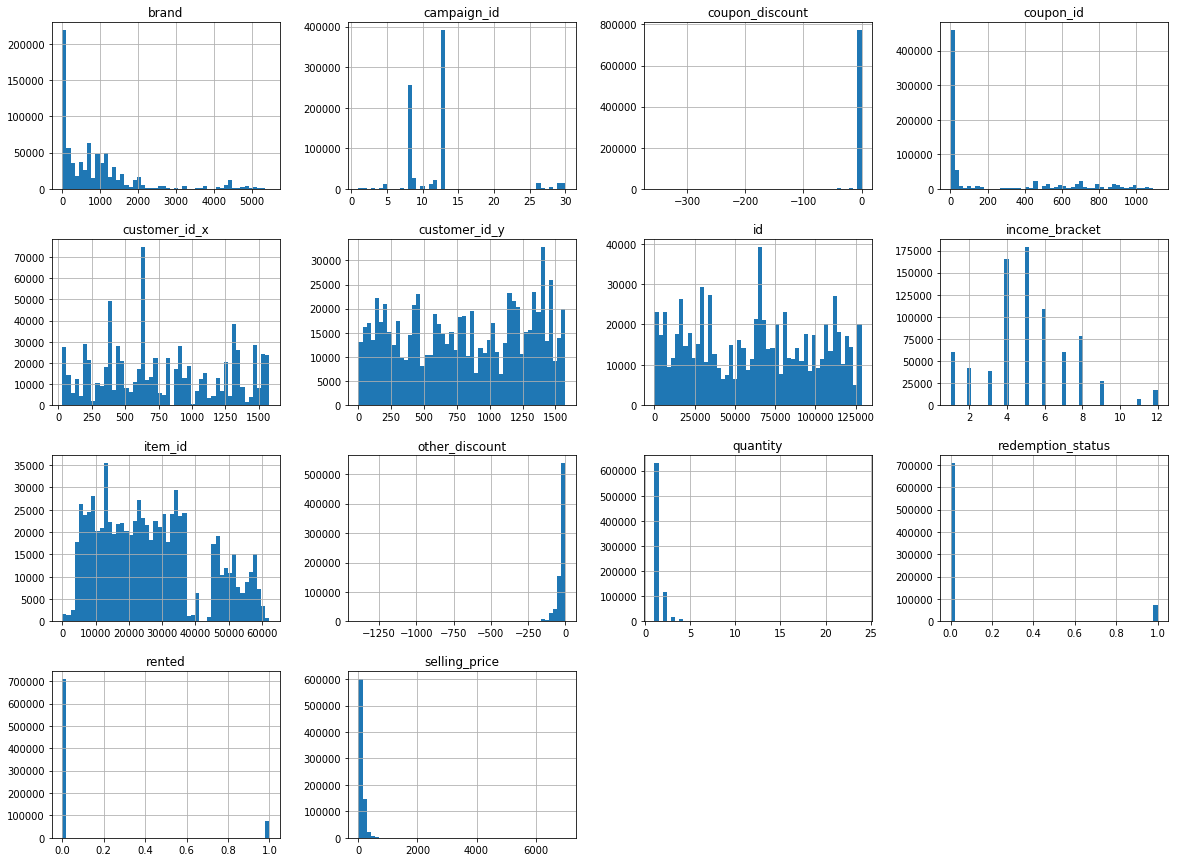

In [4]:
result.hist(bins=50,figsize=(20,15))

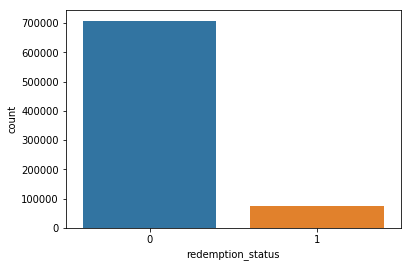

In [5]:
sns.countplot(x="redemption_status",data=result)

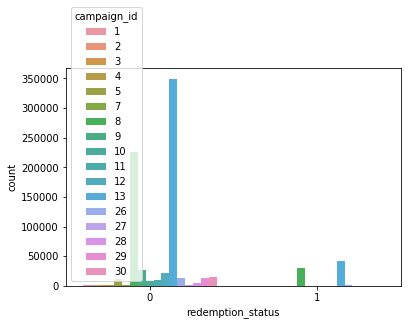

In [6]:
sns.countplot(x="redemption_status",hue="campaign_id",data=result)

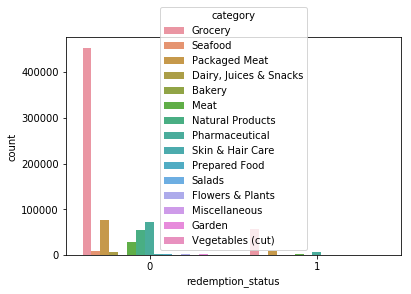

In [7]:
sns.countplot(x="redemption_status",hue="category",data=result)

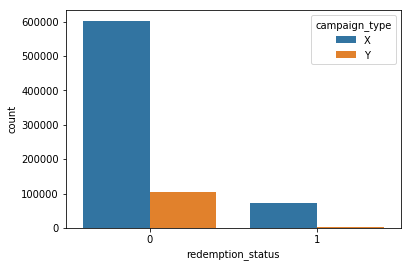

In [8]:
sns.countplot(x="redemption_status",hue="campaign_type",data=result)

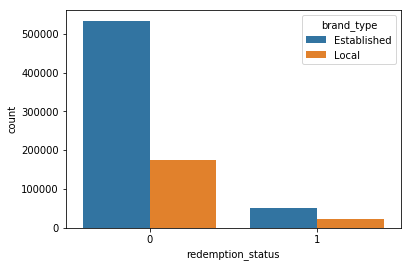

In [9]:
sns.countplot(x="redemption_status",hue="brand_type",data=result)

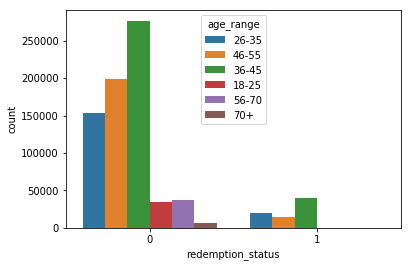

In [10]:
sns.countplot(x="redemption_status",hue="age_range",data=result)

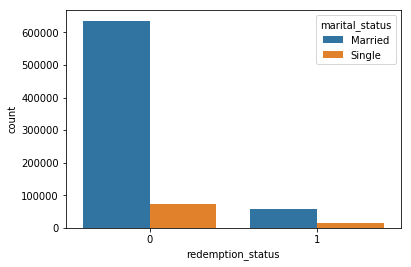

In [11]:
sns.countplot(x="redemption_status",hue="marital_status",data=result)

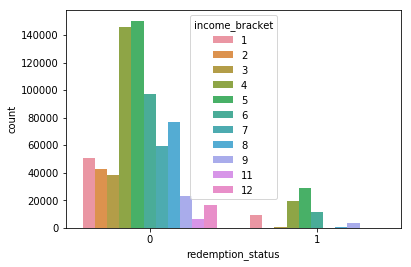

In [12]:
sns.countplot(x="redemption_status",hue="income_bracket",data=result)

## Data preprocessing and cleaning

In [13]:
result.head()

,id,campaign_id,coupon_id,customer_id_x,redemption_status,campaign_type,start_date,end_date,item_id,age_range,...,income_bracket,brand,brand_type,category,date,customer_id_y,quantity,selling_price,other_discount,coupon_discount
0,1958,13,27,1240,0,X,19/05/13,05/07/13,24775,26-35,...,5,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0
1,4494,13,27,1093,0,X,19/05/13,05/07/13,24775,46-55,...,6,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0
2,20901,13,27,1321,0,X,19/05/13,05/07/13,24775,36-45,...,1,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0
3,31335,13,27,1063,0,X,19/05/13,05/07/13,24775,26-35,...,4,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0
4,38206,13,27,888,0,X,19/05/13,05/07/13,24775,26-35,...,4,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0


In [14]:
#checking if any of the features has null value 
result.isnull().sum()

id                   0
campaign_id          0
coupon_id            0
customer_id_x        0
redemption_status    0
campaign_type        0
start_date           0
end_date             0
item_id              0
age_range            0
marital_status       0
rented               0
family_size          0
no_of_children       0
income_bracket       0
brand                0
brand_type           0
category             0
date                 0
customer_id_y        0
quantity             0
selling_price        0
other_discount       0
coupon_discount      0
dtype: int64

## Data aggregation and Feature Engineering

In [15]:
#I checked the features which had values in character and string format and converted them to numerical categorical 
#format using pd.getdummies() function. Concatenated it with the complete dataframe and removed the earlier features 
#which were now converted in categorical format.
camp_type_x=pd.get_dummies(result['campaign_type'],drop_first=True)
marital_status_s=pd.get_dummies(result['marital_status'],drop_first=True)
brandtype_e=pd.get_dummies(result['brand_type'],drop_first=True)
category_b=pd.get_dummies(result['category'],drop_first=True)
ar=pd.get_dummies(result['age_range'],drop_first=True)

In [16]:
pd.concat([result,camp_type_x,marital_status_s,brandtype_e,category_b,ar],axis=1)

,id,campaign_id,coupon_id,customer_id_x,redemption_status,campaign_type,start_date,end_date,item_id,age_range,...,Prepared Food,Salads,Seafood,Skin & Hair Care,Vegetables (cut),26-35,36-45,46-55,56-70,70+
0,1958,13,27,1240,0,X,19/05/13,05/07/13,24775,26-35,...,0,0,0,0,0,1,0,0,0,0
1,4494,13,27,1093,0,X,19/05/13,05/07/13,24775,46-55,...,0,0,0,0,0,0,0,1,0,0
2,20901,13,27,1321,0,X,19/05/13,05/07/13,24775,36-45,...,0,0,0,0,0,0,1,0,0,0
3,31335,13,27,1063,0,X,19/05/13,05/07/13,24775,26-35,...,0,0,0,0,0,1,0,0,0,0
4,38206,13,27,888,0,X,19/05/13,05/07/13,24775,26-35,...,0,0,0,0,0,1,0,0,0,0
5,61215,13,27,189,0,X,19/05/13,05/07/13,24775,26-35,...,0,0,0,0,0,1,0,0,0,0
6,65991,13,22,189,0,X,19/05/13,05/07/13,24775,26-35,...,0,0,0,0,0,1,0,0,0,0
7,118922,8,6,189,1,X,16/02/13,05/04/13,24775,26-35,...,0,0,0,0,0,1,0,0,0,0
8,65730,13,27,1131,0,X,19/05/13,05/07/13,24775,18-25,...,0,0,0,0,0,0,0,0,0,0
9,66745,13,27,921,0,X,19/05/13,05/07/13,24775,36-45,...,0,0,0,0,0,0,1,0,0,0


## Final complete dataframe after cleaning and aggregation

In [17]:
result.drop("date",axis=1,inplace=True)
result.drop("customer_id_y",axis=1,inplace=True)
result.drop("quantity",axis=1,inplace=True)
result.drop("selling_price",axis=1,inplace=True)
result.drop("other_discount",axis=1,inplace=True)
result.drop("coupon_discount",axis=1,inplace=True)
result.drop(['campaign_type','marital_status','start_date','end_date','brand_type','category','age_range','family_size','no_of_children'],axis=1,inplace=True)

## Validation or train_test_split

In [18]:
x=result.drop("redemption_status",axis=1)
y=result["redemption_status"]

In [19]:
#Splitted the trainign and the testing set in 70:30 ratio 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2)

## Training using Logistic Regression 

In [33]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Accuracy, ROC AUC score in %  and Roc curve but the model is underfitted

('Accuracy score :', 90.36905491959662)
Logistic: ROC AUC=50.000


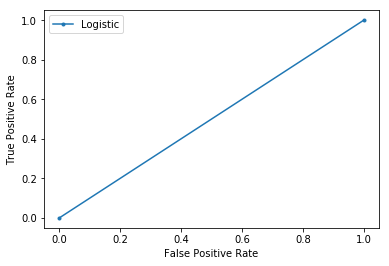

In [34]:
predictions = logmodel.predict(X_test)
print ("Accuracy score :",accuracy_score(y_test,predictions)*100)
lr_auc = roc_auc_score(y_test, predictions)
print('Logistic: ROC AUC=%.3f' % (lr_auc*100))
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## After removing underfitting final accuracy score and ROC curve

('Accuracy score :', 62.650330471518124)


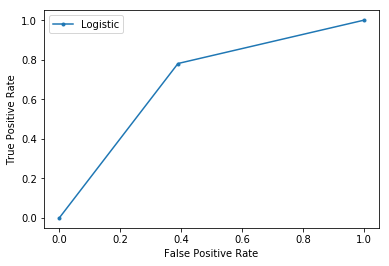

In [24]:
#Removed underfitting by changing some of the parameters as shown below
logmodel=LogisticRegression(class_weight='balanced', random_state=42, multi_class='auto')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print ("Accuracy score :",accuracy_score(y_test,predictions)*100)
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Final ROC AUC score after removing underfitting in logistic regression

In [27]:
lr_auc = roc_auc_score(y_test, predictions)
print('Logistic: ROC AUC=%.3f' % (lr_auc*100))

Logistic: ROC AUC=69.557


## Training using Decision Tree Classifier

In [29]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Accuracy, ROC AUC score in %  and Roc curve but the model is overfitted

('Accuracy score :', 99.99531548105752)
Decision Trees : ROC AUC=99.986


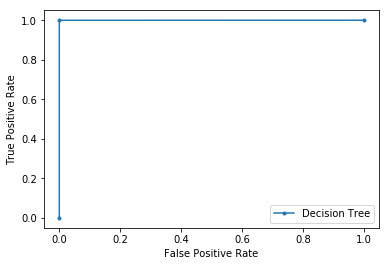

In [30]:
predictions = clf.predict(X_test)
print ("Accuracy score :",accuracy_score(y_test,predictions)*100)
lr_auc = roc_auc_score(y_test, predictions)
print('Decision Trees : ROC AUC=%.3f' % (lr_auc*100))
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## After removing overfitting final accuracy score and ROC curve

('Accuracy score :', 97.96819637503407)


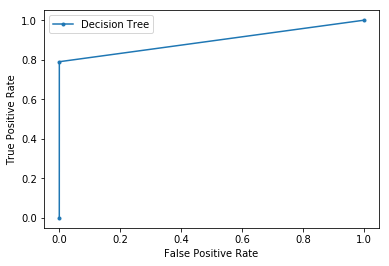

In [31]:
#Removed overfitting by changing some of the parameters as shown below
clf=DecisionTreeClassifier(min_samples_split=7, random_state=42, max_depth=None,max_features=None, max_leaf_nodes=29)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print ("Accuracy score :",accuracy_score(y_test,predictions)*100)
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Final ROC AUC score after removing overfitting in Decision trees

In [32]:
lr_auc = roc_auc_score(y_test, predictions)
print('Decision Tree: ROC AUC=%.3f' % (lr_auc*100))

Decision Tree: ROC AUC=89.503
